In [2]:
import wavedrom
import cairosvg                                                                                                                                                                                                                                                                                                                                                                    
from PIL import Image, ImageOps                                                                                                                                                                                                                                                                                                                                                              
import matplotlib.pyplot as plt                                                                                                                                                                                                                                                                                                                                                    
import numpy as np

class LogicPlotter():
    def my_lines(self,ax, pos, *args, **kwargs):
        if ax == 'x':
            for p in pos:
                plt.axvline(p, *args, **kwargs)
        else:
            for p in pos:
                plt.axhline(p, *args, **kwargs)
                
    def make_logic(self,circuit):
        svg = wavedrom.render(f"""{circuit}
        """)
        svg["width"] ="2500px"
        svg["height"] ="1500px"
        svg.saveas("/tmp/output.svg")
        cairosvg.svg2png(url='/tmp/output.svg', write_to='/tmp/output.png')                                                                                                                                                                                                                                                                                                                          
        image = Image.open("/tmp/output.png")                                                                                                                                                                                                                                                                                                                                       
        image = ImageOps.expand(image, border=10, fill='black')      
        plt.figure(figsize=(8, 8))  # Adjust the width and height values as desired                                                                                                                                                                                                                                                                                                        
        plt.imshow(image)                                                                                                                                                                                                                                                                                                                                                                  
        plt.axis('off')                                                                                                                                                                                                                                                                                                                                                                    
        plt.show()               
        
    def make_timing_diagram(self,dict_of_functions):
        plt.rcParams['figure.figsize'] = [15, 10]
        plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
        fns = dict_of_functions
        fns = {key:np.repeat(fn,1) for (key,fn) in fns.items()}
        fns2 = {key:np.repeat(fn,2) for (key,fn) in fns.items()}
        t = 0.5 * np.arange(len(fns2["A"]))

        lenrange = range(len(fns2["A"]))
        self.my_lines('x',lenrange, color='.5', linewidth=2)
        self.my_lines('y', [-0.5+2*i for i in lenrange], color='.5', linewidth=1)

        for i, (label,fn) in enumerate(fns.items()):
            plt.step(t, np.repeat(fn,2) + i*2, 'r', linewidth = 2, where='post')
            plt.text(-1.75,i*2, label)# Add the letter "a" at position (1, 1)                                                                                                                       
            for tbit, bit in enumerate(fn):
                plt.text(tbit+0.25, (0.5+2*i), str(bit))

        plt.ylim([-1.5,2*len(fns)])
        plt.xlim([-2,len(fns['A'])])
        plt.yticks([])
        plt.gca().axis('on')
        plt.show()

# EET3300 Module 7 - Timing 

## 1. Draw a timing diagram for $Z(A, B, C) = (A′B + B′C)$. 
- Inverters have a propagation delay of 2 ns  
- AND and OR gates have a propagation delay of 5 ns. The input signals are shown in figure 9.5.

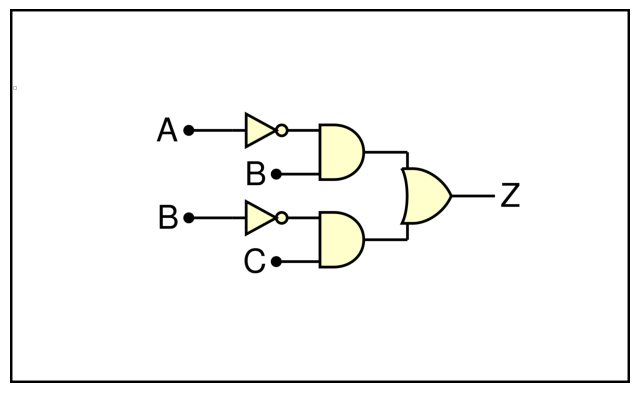

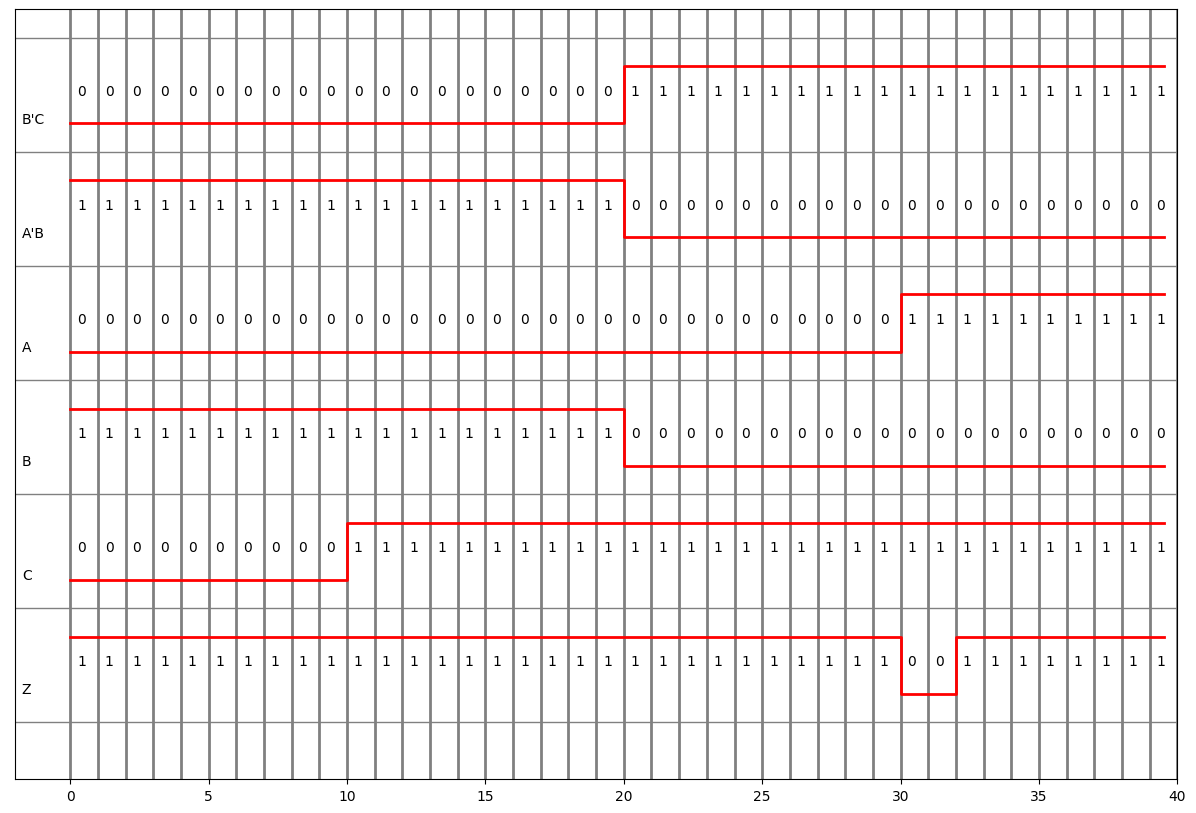

In [107]:

tp = LogicPlotter()
circuit = { "assign":[
      ["Z",
        ["|",
          ["&", ["~", "A"], "B"],
          ["&", ["~", "B"], "C"],
        ]
      ]
    ]}

tp.make_logic(circuit)
fns= {
    "Z":[
        1,1,1,1,1,1,1,1,1,1,
        1,1,1,1,1,1,1,1,1,1,
        1,1,1,1,1,1,1,1,1,1,
        0,0,1,1,1,1,1,1,1,1,
       ],
    "C":[
        0,0,0,0,0,0,0,0,0,0,
        1,1,1,1,1,1,1,1,1,1,
        1,1,1,1,1,1,1,1,1,1,
        1,1,1,1,1,1,1,1,1,1,
       ],
    "B":[
        1,1,1,1,1,1,1,1,1,1,
        1,1,1,1,1,1,1,1,1,1,
        0,0,0,0,0,0,0,0,0,0,
        0,0,0,0,0,0,0,0,0,0,
        ], 
    "A":[
        0,0,0,0,0,0,0,0,0,0,
        0,0,0,0,0,0,0,0,0,0,
        0,0,0,0,0,0,0,0,0,0,
        1,1,1,1,1,1,1,1,1,1,
       ], 
     }

fns["A\'B"] =   [int(bit) for bit in np.logical_and(np.logical_not(fns['A']), fns['B'])]
fns["B\'C"] =   [int(bit) for bit in np.logical_and(np.logical_not(fns['B']), fns['C'])]
tp.make_timing_diagram(fns)

## 2. Draw a timing diagram for $F(A, B, C)=(B ⊕ C)(A + C)$. 
- AND gates have a delay of 2 ns
- OR gateshave a delay of 3 ns
- XOR gates have a delay of 5 ns. The input signals are shown in figure 9.5.

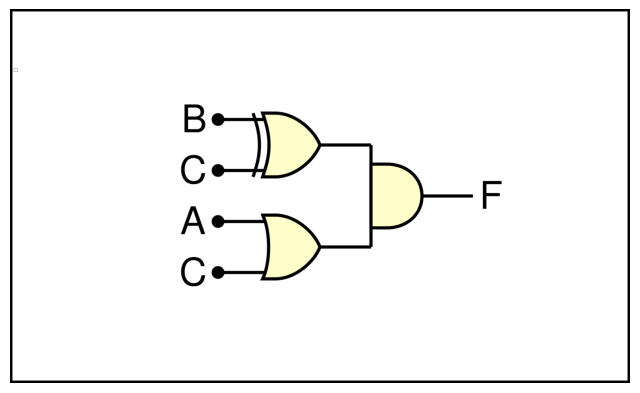

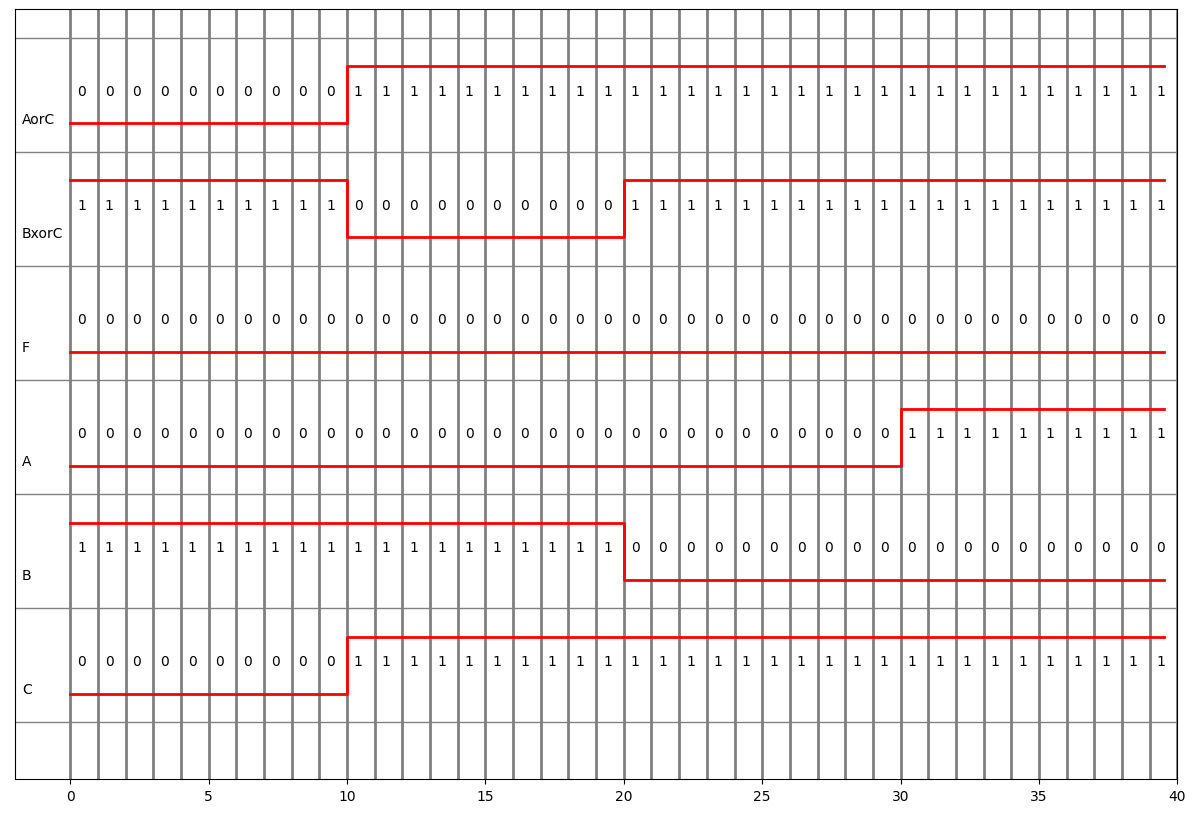

In [108]:
tp = LogicPlotter()
circuit = { "assign":[
      ["F",
        ["&",
          ["^", "B", "C"],
          ["|", "A", "C"],
        ]
      ]
    ]}

fns= {
    "C":[
        0,0,0,0,0,0,0,0,0,0,
        1,1,1,1,1,1,1,1,1,1,
        1,1,1,1,1,1,1,1,1,1,
        1,1,1,1,1,1,1,1,1,1,
       ],
    "B":[
        1,1,1,1,1,1,1,1,1,1,
        1,1,1,1,1,1,1,1,1,1,
        0,0,0,0,0,0,0,0,0,0,
        0,0,0,0,0,0,0,0,0,0,
        ], 
    "A":[
        0,0,0,0,0,0,0,0,0,0,
        0,0,0,0,0,0,0,0,0,0,
        0,0,0,0,0,0,0,0,0,0,
        1,1,1,1,1,1,1,1,1,1,
       ], 
    "F":[
        0,0,0,0,0,0,0,0,0,0,
        0,0,0,0,0,0,0,0,0,0,
        0,0,0,0,0,0,0,0,0,0,
        0,0,0,0,0,0,0,0,0,0,
       ],
     }
fns['BxorC'] =  [int(bit) for bit in np.logical_xor(fns['B'], fns['C'])]
fns['AorC'] =   [int(bit) for bit in np.logical_or(fns['A'], fns['C'])]
tp.make_logic(circuit)
tp.make_timing_diagram(fns)

## 4. Draw a timing diagram for $F(A, B, C, D) = A'C'D + A'BC'$
All logic gates have a propagation delay of 5 ns. The input signals are shown in figure 9.6.

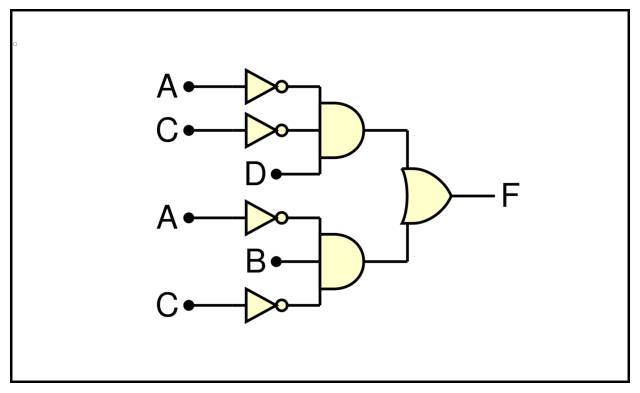

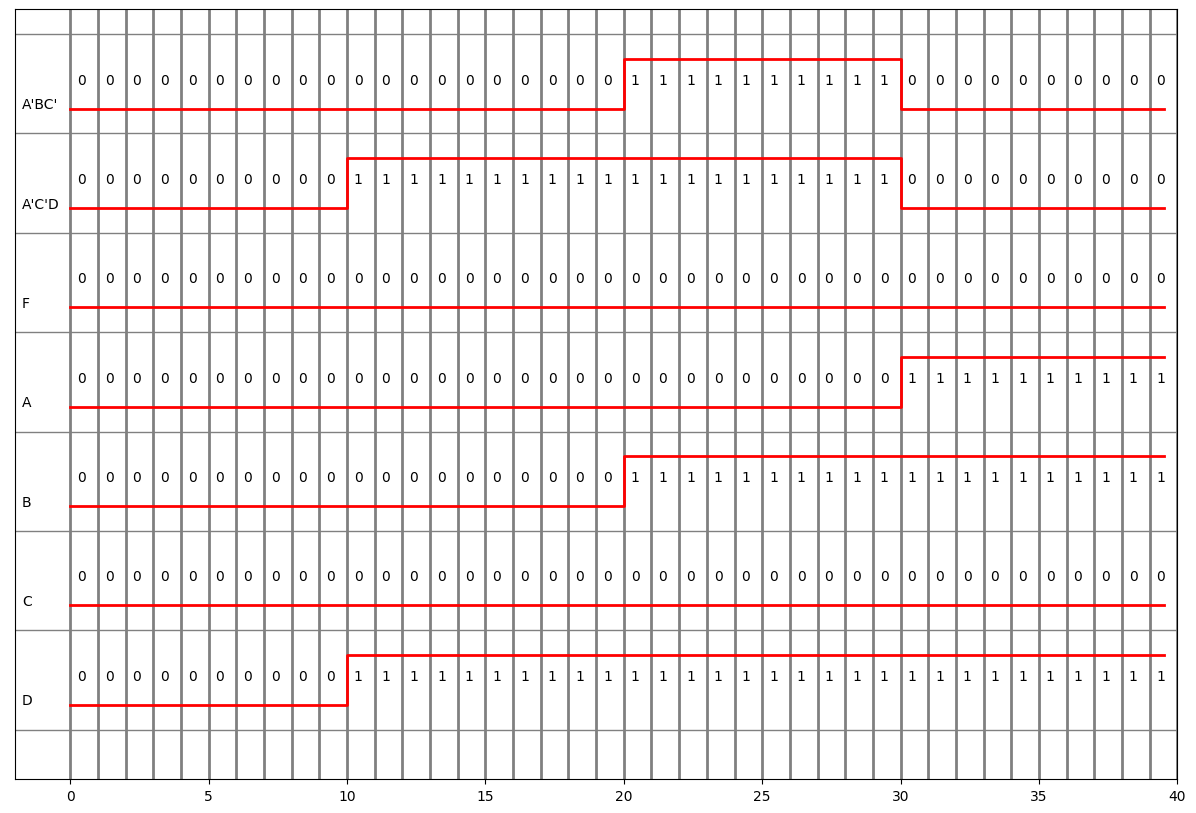

In [109]:
tp = LogicPlotter()
circuit = { "assign":[
      ["F",
        ["|",
          ["&", ["~","A"], ["~","C"],"D"],
          ["&", ["~","A"],"B" ,["~","C"]],
        ]
      ]
    ]}

tp.make_logic(circuit)

fns= {
    "D":[
        0,0,0,0,0,0,0,0,0,0,
        1,1,1,1,1,1,1,1,1,1,
        1,1,1,1,1,1,1,1,1,1,
        1,1,1,1,1,1,1,1,1,1,
       ],
    "C":[
        0,0,0,0,0,0,0,0,0,0,
        0,0,0,0,0,0,0,0,0,0,
        0,0,0,0,0,0,0,0,0,0,
        0,0,0,0,0,0,0,0,0,0,
       ],
    "B":[
        0,0,0,0,0,0,0,0,0,0,
        0,0,0,0,0,0,0,0,0,0,
        1,1,1,1,1,1,1,1,1,1,
        1,1,1,1,1,1,1,1,1,1,
        ], 
    "A":[
        0,0,0,0,0,0,0,0,0,0,
        0,0,0,0,0,0,0,0,0,0,
        0,0,0,0,0,0,0,0,0,0,
        1,1,1,1,1,1,1,1,1,1,
       ], 
    "F":[
        0,0,0,0,0,0,0,0,0,0,
        0,0,0,0,0,0,0,0,0,0,
        0,0,0,0,0,0,0,0,0,0,
        0,0,0,0,0,0,0,0,0,0,
       ],
     }

XOR = np.logical_xor
OR = np.logical_or
AND = np.logical_and
NOT = np.logical_not

fns['A\'C\'D'] =  [int(bit) for bit in ( 
                 AND(NOT(fns['A']), AND(NOT(fns['C']),fns['D']))
)]
fns['A\'BC\''] =  [int(bit) for bit in ( 
                 AND(NOT(fns['A']), AND(NOT(fns['C']),fns['B']))
)]
tp.make_timing_diagram(fns)

## 5. Look up the datasheet for the 74LS139A 2 to 4 decoder. 
- Although we haven’t discussed decoders yet, you will be able to interpret the logic diagram which only uses inverters and NAND gates. Assuming that every logic gate has a delay of 10 ns, draw the output for 1Y 1 giving the input signals shown in figure 9.7

# Hazards 

## 1. Find a hazard-free SOP expression for $F(A, B, C)=Σm(2, 3, 5, 7).$

## 3. Find a NAND-only hazard-free expression for $F(A, B, C, D)=Σm(0, 1, 3, 4, 6, 11) + Σd(8, 12, 13)$